# Notebook Title

**Authorship:**
Adam Klie, *04/06/2022*
***
**Description:**
Notebook to perform an an analysis of per nucleotide feature importances given by a preliminary neural network
***
<div class="alert alert-block alert-warning">
<b>TODOs</b>:
<ul>
    <b><li></li></b>
    <b><li></li></b>
    <b><li></li></b>
    </ul>
</div>

# Set-up

In [53]:
# The classics
import pandas as pd
import numpy as np
np.random.seed(13)

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

import matplotlib.style
import matplotlib as mpl
mpl.style.use("presentation")

import bobs_toolbelt

In [54]:
# File paths
imp_file = "../results/benchmark/0.09-0.4_ohe-seq_baseline_bissLSTM/preliminary_importance_scores.tsv"
metadata_file = "../data/2021_OLS_Library/2021_OLS_Library.tsv"

In [55]:
imp_df = pd.read_csv(imp_file, sep="\t")
meta_df = pd.read_csv(metadata_file, sep="\t", low_memory=False)
score_df = imp_df[imp_df.columns[imp_df.columns.str.contains("POS")]]

In [57]:
indexes = np.random.choice(imp_df.index, size=10000)
importances = imp_df.loc[indexes]
metadata = meta_df.loc[indexes]
scores = score_df.loc[indexes]

# Unsupervised analysis

## Run PCA

In [58]:
from bobs_toolbelt import unsupervised

In [59]:
pca, pca_df = unsupervised.scaled_PCA(scores)
pca_embedding = pca_df.values

Make sure your matrix is sample by feature


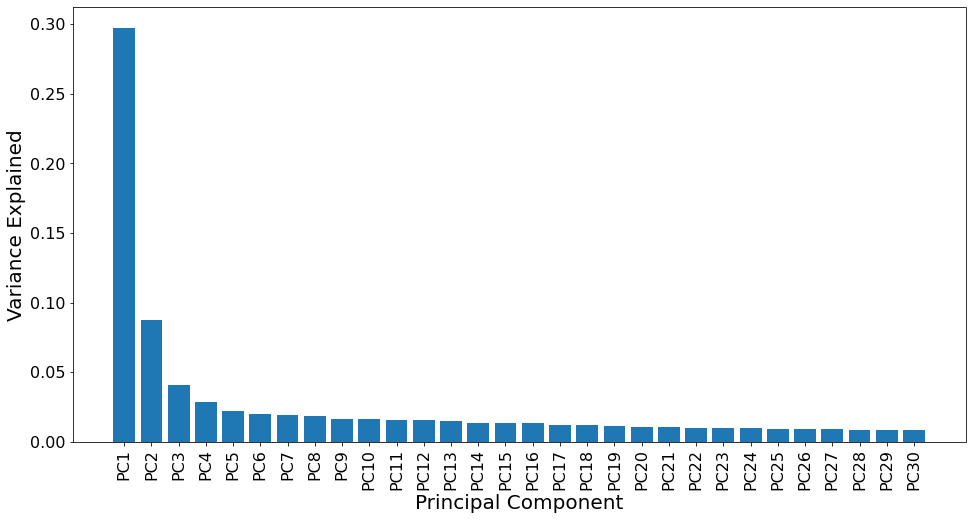

In [60]:
pc_var_explained = unsupervised.make_skree_plot(pca)

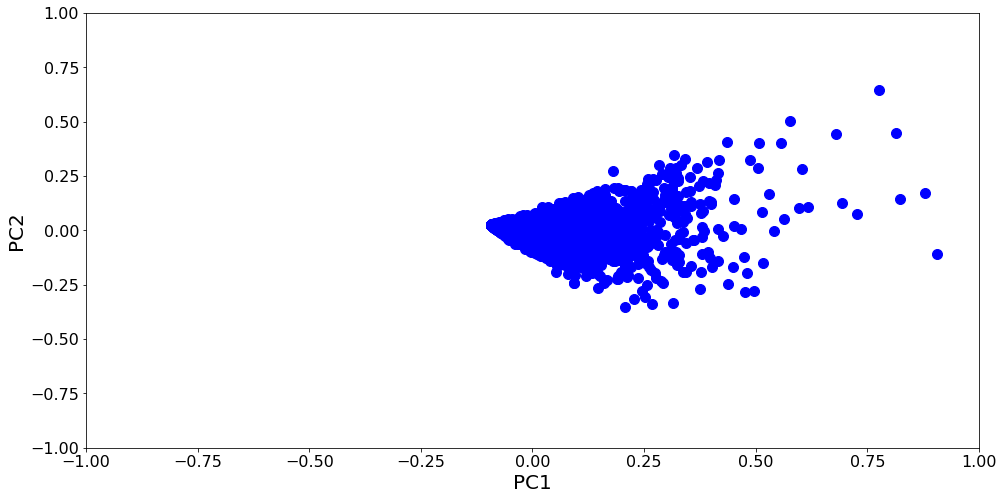

In [61]:
ax = unsupervised.pca_plot(pca_embedding)

## Run UMAP

In [65]:
reducer, umap_df = unsupervised.scaled_UMAP(scores)

Make sure your matrix is sample by feature


In [66]:
umap_embedding =  umap_df.values

## Visualize

In [68]:
metadata

,NAME,SEQ,MPRA_FXN,MICROSCOPE_FXN,ACTIVITY_SUMRNA_NUMDNA,SEQ_LEN,linker_1,TFBS_1,linker_2,TFBS_2,linker_3,TFBS_3,linker_4,TFBS_4,linker_5,TFBS_5,linker_6
178352,S3-E1F-S1-G3R-S5-G2F-S4-G1F-S2-E2F-S6,TTTCGAAACGGAAGTCATCTGAAGCTCCCTATCTTAGATATTTGCT...,NaN,NaN,0.398761,66,S3,E1F,S1,G3R,S5,G2F,S4,G1F,S2,E2F,S6
253456,S1-E2F-S2-G3R-S3-G1F-S4-E1F-S5-G2F-S6,CATCTGAAGCTCAAGGAAATTACCTATCTTTTTCGAAGAGATAACT...,NaN,NaN,0.221923,66,S1,E2F,S2,G3R,S3,G1F,S4,E1F,S5,G2F,S6
256742,S5-E2F-S2-G3F-S1-G1F-S4-E1F-S3-G2F-S6,AAGGAAATTAAAGATAGGCATCTGAAGCTCGAGATAACTGCTCACG...,1.0,NaN,0.484354,66,S5,E2F,S2,G3F,S1,G1F,S4,E1F,S3,G2F,S6
164706,S5-E1F-S2-G3F-S4-G1R-S3-E2F-S1-G2F-S6,ACGGAAGTTAAAGATAGGTGCTCGTTATCTCTTTCGAAAAGGAAAT...,1.0,NaN,0.708624,66,S5,E1F,S2,G3F,S4,G1R,S3,E2F,S1,G2F,S6
218868,S5-E2R-S4-E1F-S3-G2R-S2-G1F-S1-G3R-S6,ATTTCCTTTGCTCACGGAAGTTTTCGAAAATATCTTAGAGATAACC...,0.0,NaN,0.044391,66,S5,E2R,S4,E1F,S3,G2R,S2,G1F,S1,G3R,S6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399031,S5-G3R-S3-E1F-S1-G1R-S4-G2F-S2-E2R-S6,CCTATCTTTTTCGAAACGGAAGTCATCTGAAGCTCGTTATCTCTGC...,0.0,NaN,0.022518,66,S5,G3R,S3,E1F,S1,G1R,S4,G2F,S2,E2R,S6
242111,S1-E2R-S2-G2F-S5-E1R-S4-G3R-S3-G1F-S6,CATCTGAAGCTCATTTCCTTTAAGATATTACTTCCGTTGCTCCCTA...,1.0,NaN,0.674542,66,S1,E2R,S2,G2F,S5,E1R,S4,G3R,S3,G1F,S6
52512,S4-G1R-S2-G2R-S3-E1F-S5-G3F-S1-E2F-S6,TGCTCGTTATCTCTAAATATCTTTTCGAAACGGAAGTAAGATAGGC...,1.0,NaN,0.474797,66,S4,G1R,S2,G2R,S3,E1F,S5,G3F,S1,E2F,S6
444681,S5-G3F-S1-G2R-S2-G1F-S3-E2R-S4-E1F-S6,AAGATAGGCATCTGAAGCTCAATATCTTAGAGATAACTTTCGAAAT...,0.0,NaN,0.046460,66,S5,G3F,S1,G2R,S2,G1F,S3,E2R,S4,E1F,S6


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
col = "MPRA_FXN"

In [84]:
label_map = metadata[col]
cmap = mpl.cm.get_cmap("tab20")
color_labels = metadata[col].unique()
pal = sns.color_palette("tab20", len(color_labels))
color_map = dict(zip(color_labels, pal))

Text(0, 0.5, 'UMAP_2')

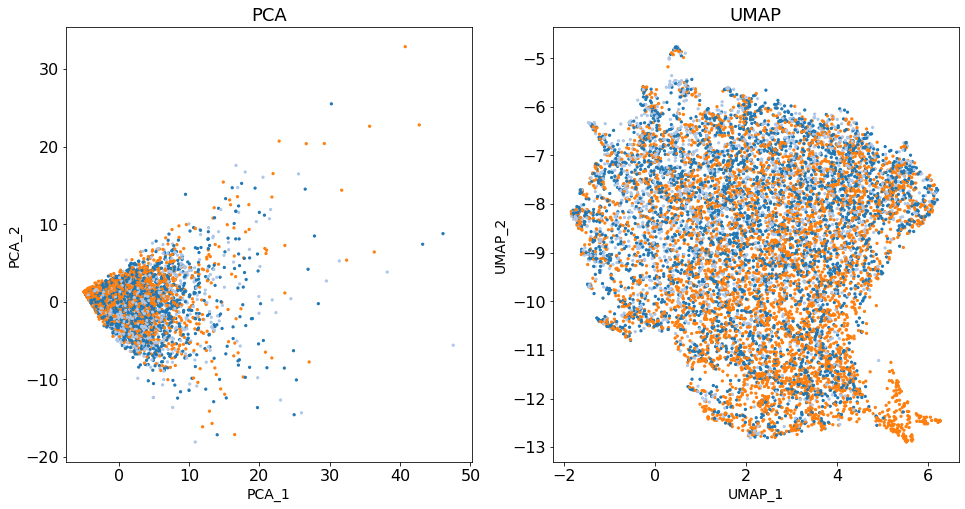

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

ax[0].scatter(
    x=pca_embedding[:, 0],
    y=pca_embedding[:, 1],
    c=label_map.map(color_map),
    s=5
)
ax[0].set_title('PCA', fontsize=18)
ax[0].set_xlabel('PCA_1', fontsize=14)
ax[0].set_ylabel('PCA_2', fontsize=14)

ax[1].scatter(
    x=umap_embedding[:, 0],
    y=umap_embedding[:, 1],
    c=label_map.map(color_map),
    s=5
)
ax[1].set_title('UMAP', fontsize=18)
ax[1].set_xlabel('UMAP_1', fontsize=14)
ax[1].set_ylabel('UMAP_2', fontsize=14)

In [90]:
full_df = pd.concat([metadata, pca_df, umap_df], axis=1)

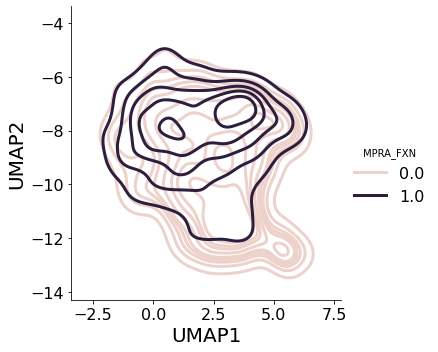

In [91]:
sns.displot(full_df, x="UMAP1", y="UMAP2", hue="MPRA_FXN", kind="kde")

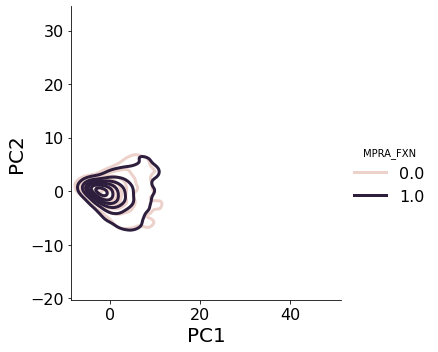

In [92]:
sns.displot(full_df, x="PC1", y="PC2", hue="MPRA_FXN", kind="kde")

In [98]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

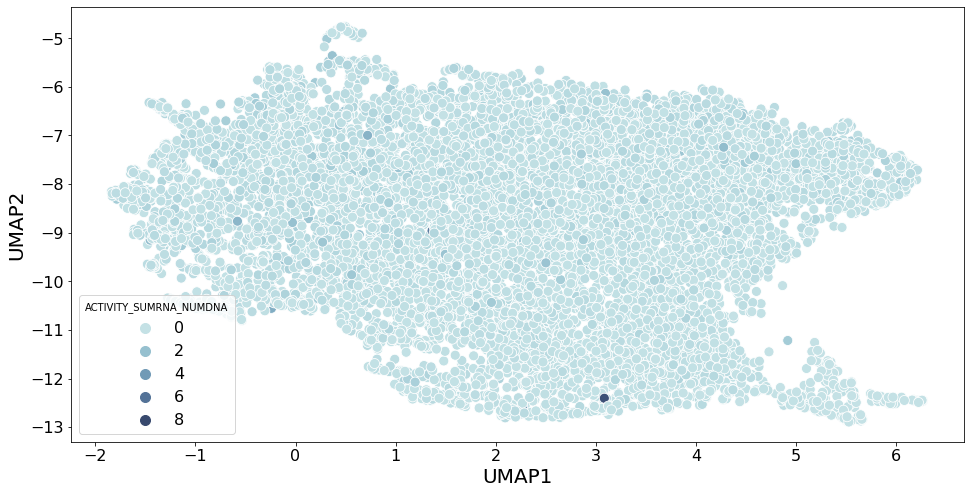

In [100]:
sns.scatterplot(data=full_df, x="UMAP1", y="UMAP2", hue="ACTIVITY_SUMRNA_NUMDNA", palette=cmap, vmin=0, vmax=1)

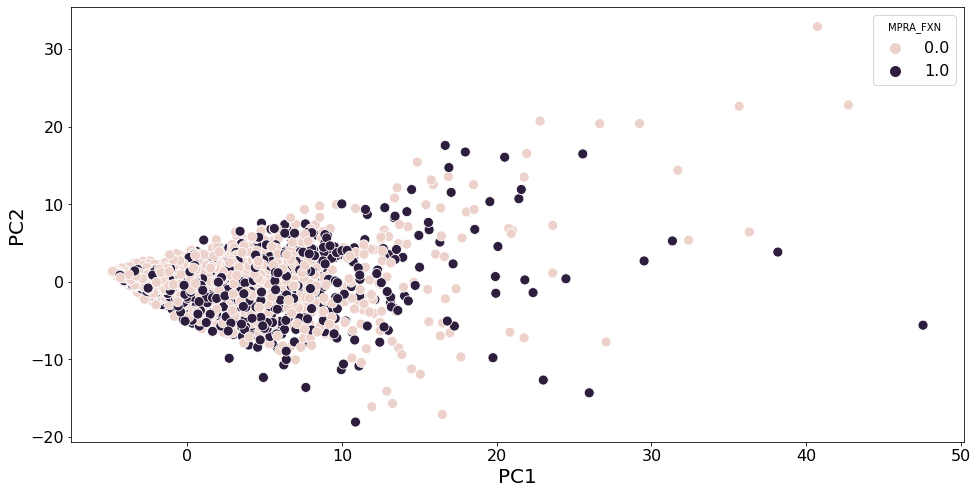

In [96]:
sns.scatterplot(data=full_df, x="PC1", y="PC2", hue="MPRA_FXN")

# Distributions
Description

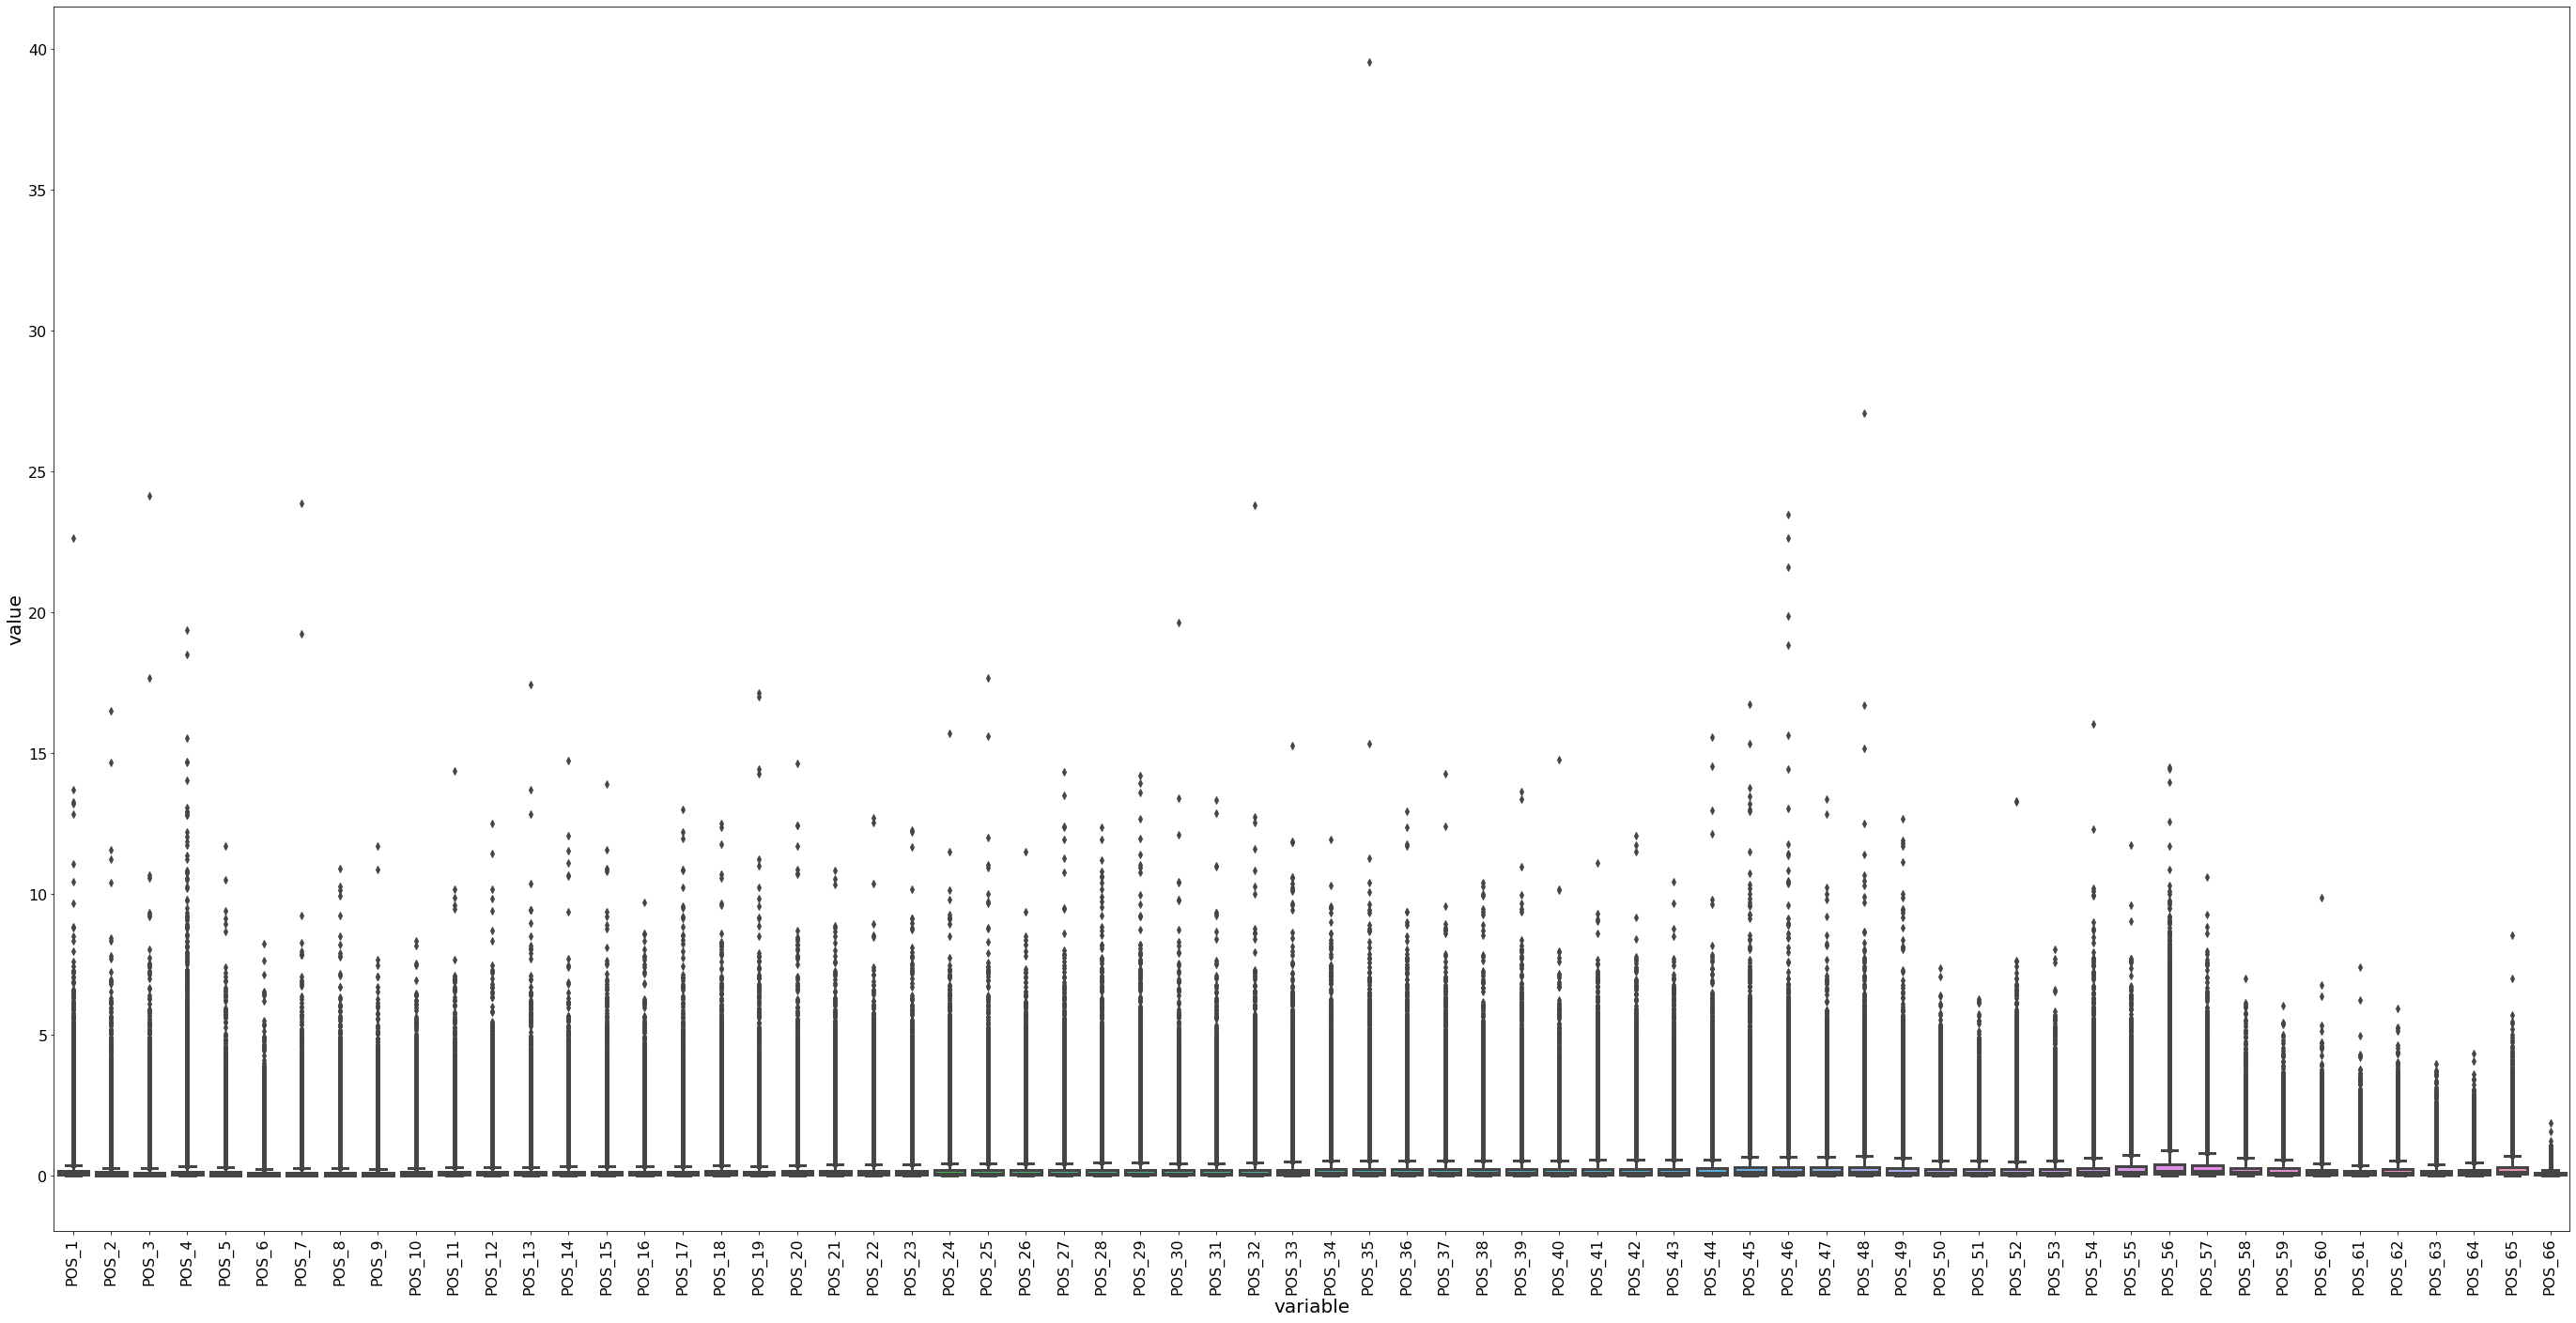

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(48, 24))
sns.boxplot(data=score_df.melt(), x="variable", y="value")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [139]:
cut_offs = score_df.mean(axis=1) + score_df.std(axis=1)*1

In [133]:
cut_offs = score_df.quantile(0.75, axis=1)

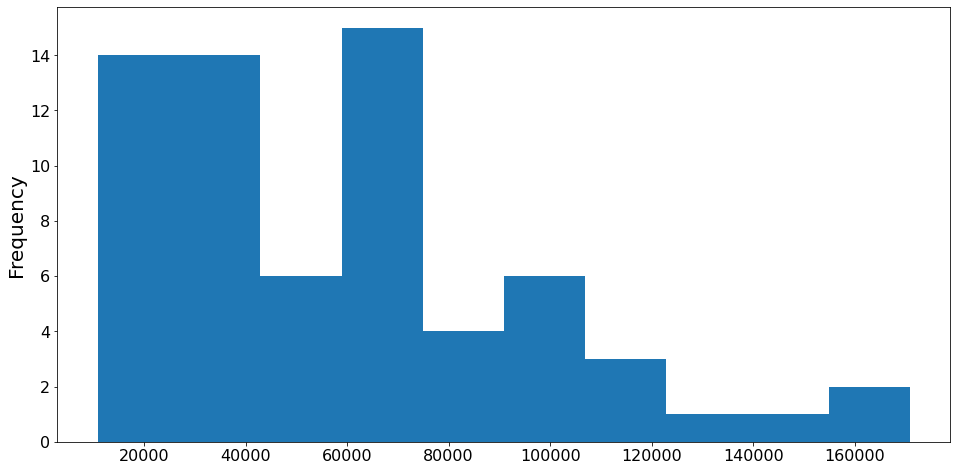

In [140]:
score_df.ge(cut_offs, axis=0).sum(axis=0).plot(kind="hist")

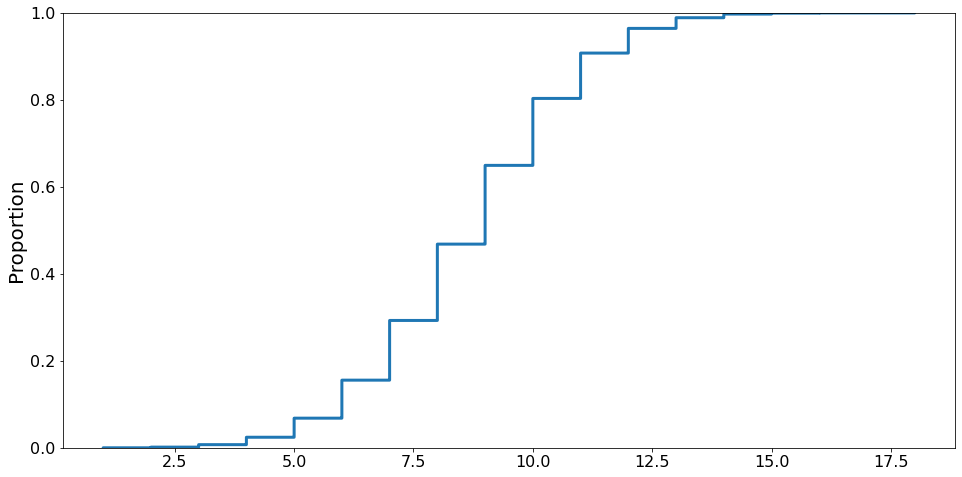

In [145]:
sns.ecdfplot(score_df.ge(cut_offs, axis=0).sum(axis=1))

In [143]:
score_df.ge(cut_offs, axis=0).sum(axis=1).plot(kind="ecdf")

ValueError: ecdf is not a valid plot kind

In [147]:
bin_imp_df = score_df.ge(cut_offs, axis=0).astype(int)

In [148]:
bin_imp_df.index = imp_df["NAME"]

In [160]:
bin_imp_df["SEQ"] = imp_df["SEQ"].values

In [164]:
bin_imp_df[["SEQ"] + bin_imp_df.columns[bin_imp_df.columns.str.contains("POS")].to_list()].to_csv("../results/benchmark/0.09-0.4_ohe-seq_baseline_bissLSTM/binary_importance_scores.tsv")

In [166]:
bin_imp_df.sum(axis=1)

NAME
S1-G1R-S2-E1F-S3-E2F-S4-G2R-S5-G3F-S6    12
S1-G1F-S2-E1F-S3-E2F-S4-G2R-S5-G3F-S6     9
S1-G1R-S2-E1F-S3-E2F-S4-G2F-S5-G3F-S6     8
S1-G1R-S2-E1F-S3-E2F-S4-G2R-S5-G3R-S6    13
S1-G1R-S2-E1R-S3-E2F-S4-G2R-S5-G3F-S6     9
                                         ..
S5-G3R-S4-G2F-S3-E2R-S2-E1F-S1-G1F-S6    10
S5-G3F-S4-G2F-S3-E2R-S2-E1R-S1-G1F-S6     8
S5-G3R-S4-G2R-S3-E2R-S2-E1R-S1-G1F-S6    11
S5-G3R-S4-G2F-S3-E2R-S2-E1R-S1-G1R-S6    11
S5-G3R-S4-G2F-S3-E2R-S2-E1R-S1-G1F-S6    11
Length: 460800, dtype: int64

# TF-Modisco

In [198]:
![[ -f scores.h5 ]] || curl -o scores.h5 https://raw.githubusercontent.com/AvantiShri/model_storage/23d8f3ffc89af210f6f0bf7e65585eff259ba672/modisco/scores.h5
![[ -f sequences.simdata.gz ]] || wget https://raw.githubusercontent.com/AvantiShri/model_storage/db919b12f750e5844402153233249bb3d24e9e9a/deeplift/genomics/sequences.simdata.gz
![[ -f test.txt.gz ]] || wget https://raw.githubusercontent.com/AvantiShri/model_storage/9aadb769735c60eb90f7d3d896632ac749a1bdd2/deeplift/genomics/test.txt.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.9M  100 21.9M    0     0  9327k      0  0:00:02  0:00:02 --:--:-- 9327k
--2022-04-06 15:47:20--  https://raw.githubusercontent.com/AvantiShri/model_storage/db919b12f750e5844402153233249bb3d24e9e9a/deeplift/genomics/sequences.simdata.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629502 (615K) [application/octet-stream]
Saving to: ‘sequences.simdata.gz’

sequences.simdata.g 100%[===================>] 614.75K  --.-KB/s    in 0.01s   

2022-04-06 15:47:20 (49.6 MB/s) - ‘sequences.simdata.gz’ saved [629502/629502]

--2022-04-06 15:47:21--  https://raw.githubusercontent.com/AvantiShri/model_storag

In [346]:
#Functions for one-hot encoding sequences
import gzip

def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1

#read in the data in the testing set
test_ids_fh = gzip.open("test.txt.gz","rb")
ids_to_load = set([x.rstrip() for x in test_ids_fh])

fasta_sequences = []
for i,a_line in enumerate(gzip.open("sequences.simdata.gz","rb")):
    if (i==0):
        next
    a_line = a_line.rstrip()
    seq_id,seq_fasta,embeddings,task1,task2,task3 = a_line.split(b"\t")
    if seq_id in ids_to_load:
        fasta_sequences.append(seq_fasta.decode("utf-8"))

In [347]:
import h5py
from collections import OrderedDict
import numpy as np

task_to_scores = OrderedDict()
task_to_hyp_scores = OrderedDict()

f = h5py.File("scores.h5","r")
tasks = f["contrib_scores"].keys()
n = 100 #len(fasta_sequences) #100 #since this is just a test run, for speed I am limiting to 100 sequences
#reverse-complement some of the sequences to simulate that
take_rc = (np.random.RandomState(1234).uniform(size=n) > 0.5)
for task in tasks:
    #Note that the sequences can be of variable lengths;
    #in this example they all have the same length (200bp) but that is
    #not necessary.
    task_to_scores[task] = [np.array(x) if not rc else np.array(x)[::-1,::-1]
                            for x,rc in zip(f['contrib_scores'][task][:n], take_rc)]
    task_to_hyp_scores[task] = [np.array(x) if not rc else np.array(x)[::-1,::-1]
                                for x,rc in zip(f['hyp_contrib_scores'][task][:n], take_rc)]

onehot_data = [one_hot_encode_along_channel_axis(seq) if not rc else
               one_hot_encode_along_channel_axis(seq)[::-1,::-1]
               for seq,rc in zip(fasta_sequences[:n], take_rc)]

In [342]:
task_hyp_scores["task0"][0][:5].dtype

dtype('<f4')

In [167]:
import modisco

In [168]:
import modisco.visualization
from modisco.visualization import viz_sequence

In [289]:
onehot = np.load("../results/benchmark/0.09-0.4_ohe-seq_baseline_bissLSTM/seq.npy")

In [401]:
n=200

In [402]:
onehot = [one_hot_encode_along_channel_axis(seq) for seq in meta_df["SEQ"].values[:n]]

In [403]:
scores = np.load("../results/benchmark/0.09-0.4_ohe-seq_baseline_bissLSTM/seq_scores.npy")

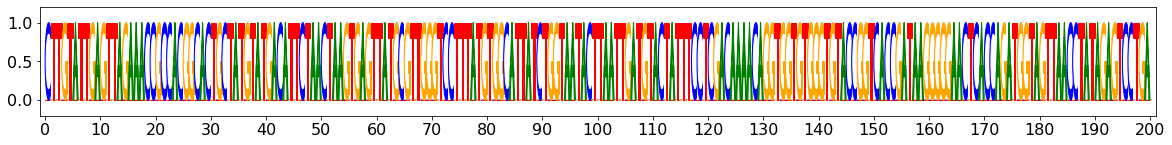

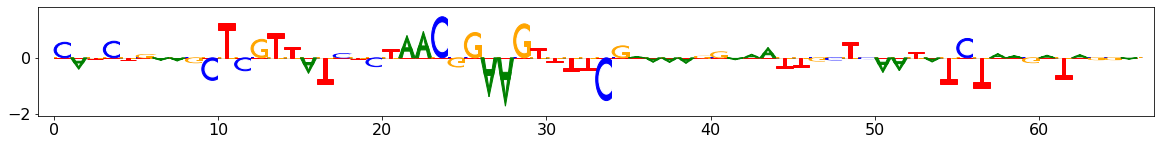

In [404]:
viz_sequence.plot_weights(onehot_data[0], subticks_frequency=10)
viz_sequence.plot_weights(scores[0], subticks_frequency=10)

In [405]:
task_scores = OrderedDict()
task_scores["task0"] = [np.array(x) for x in scores[:n]]

In [406]:
null_per_pos_scores = modisco.coordproducers.LaplaceNullDist(num_to_samp=5000)

In [407]:
seqlet = modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
    trim_to_window_size=8,
    initial_flank_to_add=5,
    final_flank_to_add=5,
    final_min_cluster_size=30,
    n_cores=4)

In [408]:
tfmod = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    sliding_window_size=4,
    flank_size=2,
    target_seqlet_fdr=0.3,
    seqlets_to_patterns_factory=seqlet)

MEMORY 10.118656
On task task0
Computing windowed sums on original
Generating null dist
peak(mu)= -0.002717847069492564
Computing threshold
For increasing = True , the minimum IR precision was 0.2792491643095912 occurring at 5.532801151275635e-05 implying a frac_neg of 0.38744202640028547
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.0 occurring at -3.471188705400814e-07 implying a frac_neg of 1.00000010000001e-07
To be conservative, adjusted frac neg is 0.95
Thresholds from null dist were -1.4544216096401215  and  1.1504376530647278 with frac passing 0.05579365079365079
Final raw thresholds are -1.4544216096401215  and  1.1504376530647278
Final transformed thresholds are -0.9563492063492064  and  0.9306349206349206


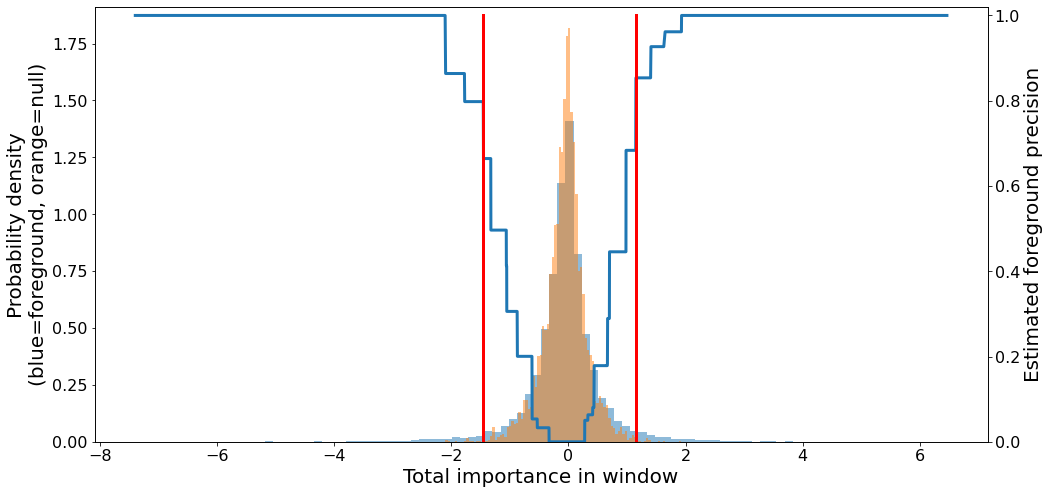

Got 265 coords
After resolving overlaps, got 265 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9305349206349206
MEMORY 10.118909952
265 identified in total
2 activity patterns with support >= 100 out of 2 possible patterns
Metacluster sizes:  [143, 122]
Idx to activities:  {0: '1', 1: '-1'}
MEMORY 10.118909952
On metacluster 1
Metacluster size 122
Relevant tasks:  ('task0',)
Relevant signs:  (-1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 122
(Round 1) Computing coarse affmat
MEMORY 10.114203648
Beginning embedding computation
MEMORY 10.114203648
At the beginning of embedding call
MEMORY 10.114203648
before computing embeddings fwd
MEMORY 10.114203648


In [ ]:
test_tfmod_result = tfmod(task_names=["task0"],
      contrib_scores=task_scores,
      hypothetical_contribs=task_scores,
      one_hot=onehot,
      null_per_pos_scores=null_per_pos_scores)

In [398]:
import h5py
import modisco.util
![[ -e results.hdf5 ]] && rm results.hdf5
grp = h5py.File("results.hdf5", "w")
test_tfmod_result.save_hdf5(grp)
grp.close()

Metaclusters heatmap


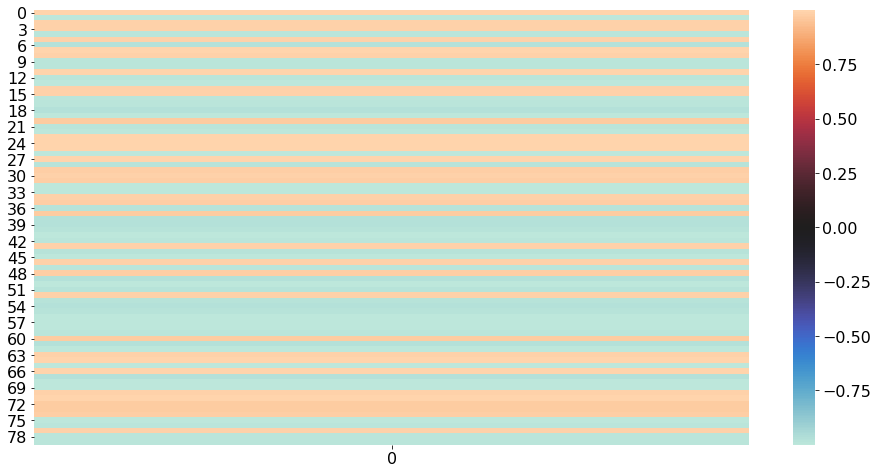

In [400]:
from collections import Counter
import numpy as np

from modisco.visualization import viz_sequence
from matplotlib import pyplot as plt

import modisco.affinitymat.core
import modisco.cluster.phenograph.core
import modisco.cluster.phenograph.cluster
import modisco.cluster.core
import modisco.aggregator

hdf5_results = h5py.File("results.hdf5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.mean(onehot_data, axis=(0,1))

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        #print("Task 1 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task1_hypothetical_contribs"]["fwd"])
        #print("Task 1 actual importance scores:")
        #viz_sequence.plot_weights(pattern["task1_contrib_scores"]["fwd"])
        #print("Task 2 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task2_hypothetical_contribs"]["fwd"])
        #print("Task 2 actual importance scores:")
        #viz_sequence.plot_weights(pattern["task2_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(pattern["sequence"]["fwd"])
        viz_sequence.plot_weights(pattern["sequence"]["rev"])
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        #Plot the subclustering too, if available
        if ("subclusters" in pattern):
            print("PLOTTING SUBCLUSTERS")
            subclusters = np.array(pattern["subclusters"])
            twod_embedding = np.array(pattern["twod_embedding"])
            plt.scatter(twod_embedding[:,0], twod_embedding[:,1], c=subclusters, cmap="tab20")
            plt.show()
            for subcluster_name in list(pattern["subcluster_to_subpattern"]["subcluster_names"]):
                subpattern = pattern["subcluster_to_subpattern"][subcluster_name]
                print(subcluster_name.decode("utf-8"), "size", len(subpattern["seqlets_and_alnmts"]["seqlets"]))
                subcluster = int(subcluster_name.decode("utf-8").split("_")[1])
                plt.scatter(twod_embedding[:,0], twod_embedding[:,1], c=(subclusters==subcluster))
                plt.show()
                viz_sequence.plot_weights(subpattern["task0_hypothetical_contribs"]["fwd"])
                viz_sequence.plot_weights(subpattern["task0_contrib_scores"]["fwd"])
                viz_sequence.plot_weights(subpattern["sequence"]["fwd"])
        
hdf5_results.close()

# Scratch
Place for old or testing code

# References